In [ ]:
'''
https://www.pyimagesearch.com/2021/07/26/pytorch-image-classification-with-pre-trained-networks/
'''

#Config


# import the necessary packages
import torch

# specify image dimension
IMAGE_SIZE = 224

# specify ImageNet mean and standard deviation
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]

# determine the device we will be using for inference
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# specify path to the ImageNet labels
IN_LABELS = "ilsvrc2012_wordnet_lemmas.txt"

In [1]:
import config

from torchvision import models
import numpy as np
import torch
import cv2

In [3]:
def preprocess_image(image):

  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(config.IMAGE_SIZE,config.IMAGE_SIZE))
  image = image.astype("float32")/255.0

  image -=config.MEAN
  image /=config.STD
  image = np.transpose(image,(2,0,1))
  image = np.expand_dims(image,0)

  return image

In [4]:
MODELS = {
	"vgg16": models.vgg16(pretrained=True),
	"vgg19": models.vgg19(pretrained=True),
	"inception": models.inception_v3(pretrained=True),
	"densenet": models.densenet121(pretrained=True),
	"resnet": models.resnet50(pretrained=True)
}

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


In [5]:
model = MODELS['vgg16'].to(config.DEVICE)
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
image = cv2.imread(r'/content/clint_eastwood.jpg')

In [7]:
orig = image.copy()

In [8]:
image = preprocess_image(image)

In [9]:
image = torch.from_numpy(image)

In [10]:
image = image.to(config.DEVICE)

In [11]:
imagenetLabels = dict(enumerate(open(config.IN_LABELS)))

In [12]:
logits = model(image)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [13]:
print(logits)

tensor([[-2.2584e-01, -4.2050e+00, -1.2859e+00, -1.2067e-02, -6.0965e-01,
         -1.4655e+00, -2.2854e+00, -6.9918e-01, -2.4964e+00, -1.0711e+00,
         -1.6856e+00, -2.3734e+00, -1.6932e+00, -1.3170e+00, -7.2578e-01,
         -1.7903e+00, -1.6371e+00, -1.8295e+00, -2.4255e-01, -6.6064e-01,
         -2.6382e+00, -4.6219e-01, -1.0142e+00, -4.8283e-01, -5.7031e-01,
         -2.4156e+00, -4.1472e+00, -2.5105e+00, -1.8973e+00, -4.4093e+00,
         -2.2991e+00, -2.4252e+00, -2.2587e+00, -2.6800e+00, -1.4442e+00,
         -3.0700e+00, -1.7906e+00, -3.4623e+00, -2.7394e+00, -1.1968e+00,
         -3.8186e+00, -3.1042e+00, -2.5293e+00, -3.8533e-01, -2.2745e+00,
         -1.4271e+00, -3.5744e+00, -2.7733e+00, -3.6298e+00, -2.4513e+00,
         -1.6284e+00,  1.3929e+00, -2.2147e+00, -1.2999e+00, -1.3982e+00,
         -3.1944e+00, -1.0543e+00, -2.7183e+00, -3.4956e+00, -2.0987e+00,
         -4.6225e-01,  2.5345e-01, -2.3700e-01,  7.6617e-01, -3.1204e+00,
         -1.4409e-01, -2.4004e+00,  6.

In [14]:
probabilities = torch.nn.Softmax(dim=1)(logits)
sortedproba = torch.argsort(probabilities,dim=1,descending=True)

In [16]:
for (i, idx) in enumerate(sortedproba[0, :5]):
	print("{}. {}: {:.2f}%".format
		(i, imagenetLabels[idx.item()].strip(),
		probabilities[0, idx.item()] * 100))

0. revolver, six-gun, six-shooter: 27.42%
1. binoculars, field_glasses, opera_glasses: 9.71%
2. assault_rifle, assault_gun: 9.12%
3. tripod: 7.10%
4. microphone, mike: 4.93%


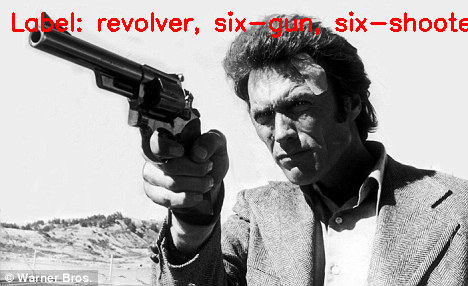

-1

In [18]:
# draw the top prediction on the image and display the image to
# our screen
from google.colab.patches import cv2_imshow
(label, prob) = (imagenetLabels[probabilities.argmax().item()],
	probabilities.max().item())
cv2.putText(orig, "Label: {}, {:.2f}%".format(label.strip(), prob * 100),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
cv2_imshow(orig)
cv2.waitKey(0)